# [AVNIR-2/ALOS の光学画像を取得](https://www.tellusxdp.com/ja/howtouse/dev/20200220_000179.html)

## AVNIR-2 の API を使用する

In [1]:
import os
import json

fpth_secret = os.path.join(os.environ['HOME'], 'jupyter/secret.json')
with open(fpth_secret) as f:
    secret = json.load(f)
TOKEN = secret['tellus']
HEADERS = {
    'Authorization': 'Bearer ' + TOKEN
}

https://gisapi.tellusxdp.com/blend/13/7276/3226.png


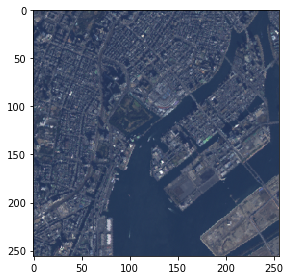

In [2]:
import requests
from skimage import io
from io import BytesIO
%matplotlib inline

def fetch_avnir2_image(tile, color):
    url = 'https://gisapi.tellusxdp.com'
    url += '/blend/{z}/{x}/{y}.png'.format(**tile)
    
    print(url)
    
    r = requests.get(url, params=color, headers=HEADERS)
    
    return io.imread(BytesIO(r.content))

tile = {
    'x': 7276,
    'y': 3226,
    'z': 13
}
color = {
    'opacity': 1,
    'r': 3,
    'g': 2,
    'b':13,
    'rdepth': 1,
    'gdepth': 1,
    'bdepth':1
}
img = fetch_avnir2_image(tile, color)
io.imshow(img)

https://gisapi.tellusxdp.com/blend/13/7276/3226.png


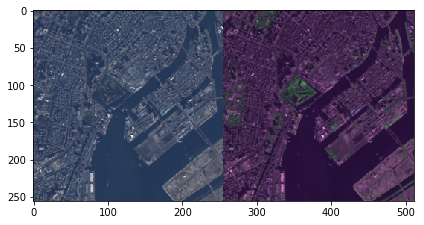

In [3]:
import numpy as np

color = {'preset': 'natural'}
natural_img = fetch_avnir2_image(tile, color)
io.imshow(np.hstack((img, natural_img)))

https://gisapi.tellusxdp.com/blend/13/7276/3226.png


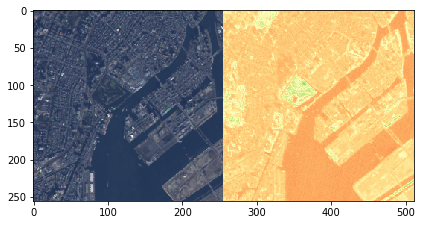

In [4]:
color = {'preset': 'ndvi'}
ndvi_img = fetch_avnir2_image(tile, color)
io.imshow(np.hstack((img, ndvi_img)))

# [AVNIR-2/ALOS の API を用いて波長別画像を取得する](https://www.tellusxdp.com/ja/howtouse/access/20200221_000206.html)

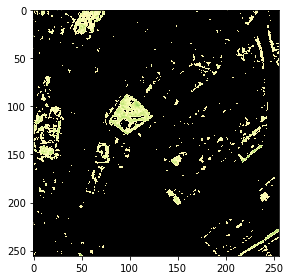

In [5]:
from PIL import Image

def filter_by_hsv(img_rgb, min_hsv, max_hsv):
    # RGBA -> RGB
    img_rgb = img_rgb[:, :, 0:3]
    
    # RGB -> HSV
    pil_img_rgb = Image.fromarray(img_rgb)
    pil_img_hsv = pil_img_rgb.convert("HSV") # h: 0 ~ 255
    np_img_hsv = np.array(pil_img_hsv)
    h, s, v = np.squeeze(np.dsplit(np_img_hsv, 3))
    
    mask = np.zeros(h.shape, dtype = np.uint8)
    mask[
        (min_hsv[0] < h) & (h < max_hsv[0]) &
        (min_hsv[1] < s) & (s < max_hsv[1]) &
        (min_hsv[2] < v) & (v < max_hsv[2])
    ] = 1
    # (h, w) -> (h, w, c)
    mask = np.repeat(mask[:, :, None], 3, axis=2)
    
    masked_img = img_rgb * mask
    return masked_img

min_hsv = np.array([35, 0, 0])
max_hsv = np.array([105, 255, 255])
masked_img = filter_by_hsv(ndvi_img, min_hsv, max_hsv)
io.imshow(masked_img)

In [6]:
def calc_nonzero_rate(img):
    nonzero_area = len(np.nonzero(img.flatten())[0])  
    print(nonzero_area)
    all_area = img.shape[0] * img.shape[1]
    print(all_area)
    rate = nonzero_area / all_area * 100 
    return rate

print(calc_nonzero_rate(masked_img), '%')

13941
65536
21.27227783203125 %
